# The Office- Words and Numbers

This was a Tidytuesday challenge from 2020 based an the American sitcom titled *The Office* about the evryday lives of employees at a paper company in Scranton Pennsylvania. 
The data comes from the Schrute R package for The Office transcripts and data.world for IMDB ratings
for all episodes.
[Tidytuesday:TheOffice-Words and Numbers](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-03-17/readme.md/)

In this project, I will explore the popularity of The Office episodes and characters who appear most 
frequently in the series.
- The data sets come in clean and do not further need cleaning.

In [2]:
library('tidyverse')
library('ggrepel')

In [3]:
office_ratings= read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-17/office_ratings.csv',
                        show_col_types=FALSE)


office_ratings |> head()

season,episode,title,imdb_rating,total_votes,air_date
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<date>
1,1,Pilot,7.6,3706,2005-03-24
1,2,Diversity Day,8.3,3566,2005-03-29
1,3,Health Care,7.9,2983,2005-04-05
1,4,The Alliance,8.1,2886,2005-04-12
1,5,Basketball,8.4,3179,2005-04-19
1,6,Hot Girl,7.8,2852,2005-04-26


### Exploring Popularity of The Office Episodes and Seasons 
> To begin the analysis, I want to visualize the popularity of individual episodes and seasons 
by graphing their IMDB ratings grouped by total votes from users.

Warning message:
“ggrepel: 2 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 12 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 23 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 21 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 25 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 23 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 23 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 23 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 20 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


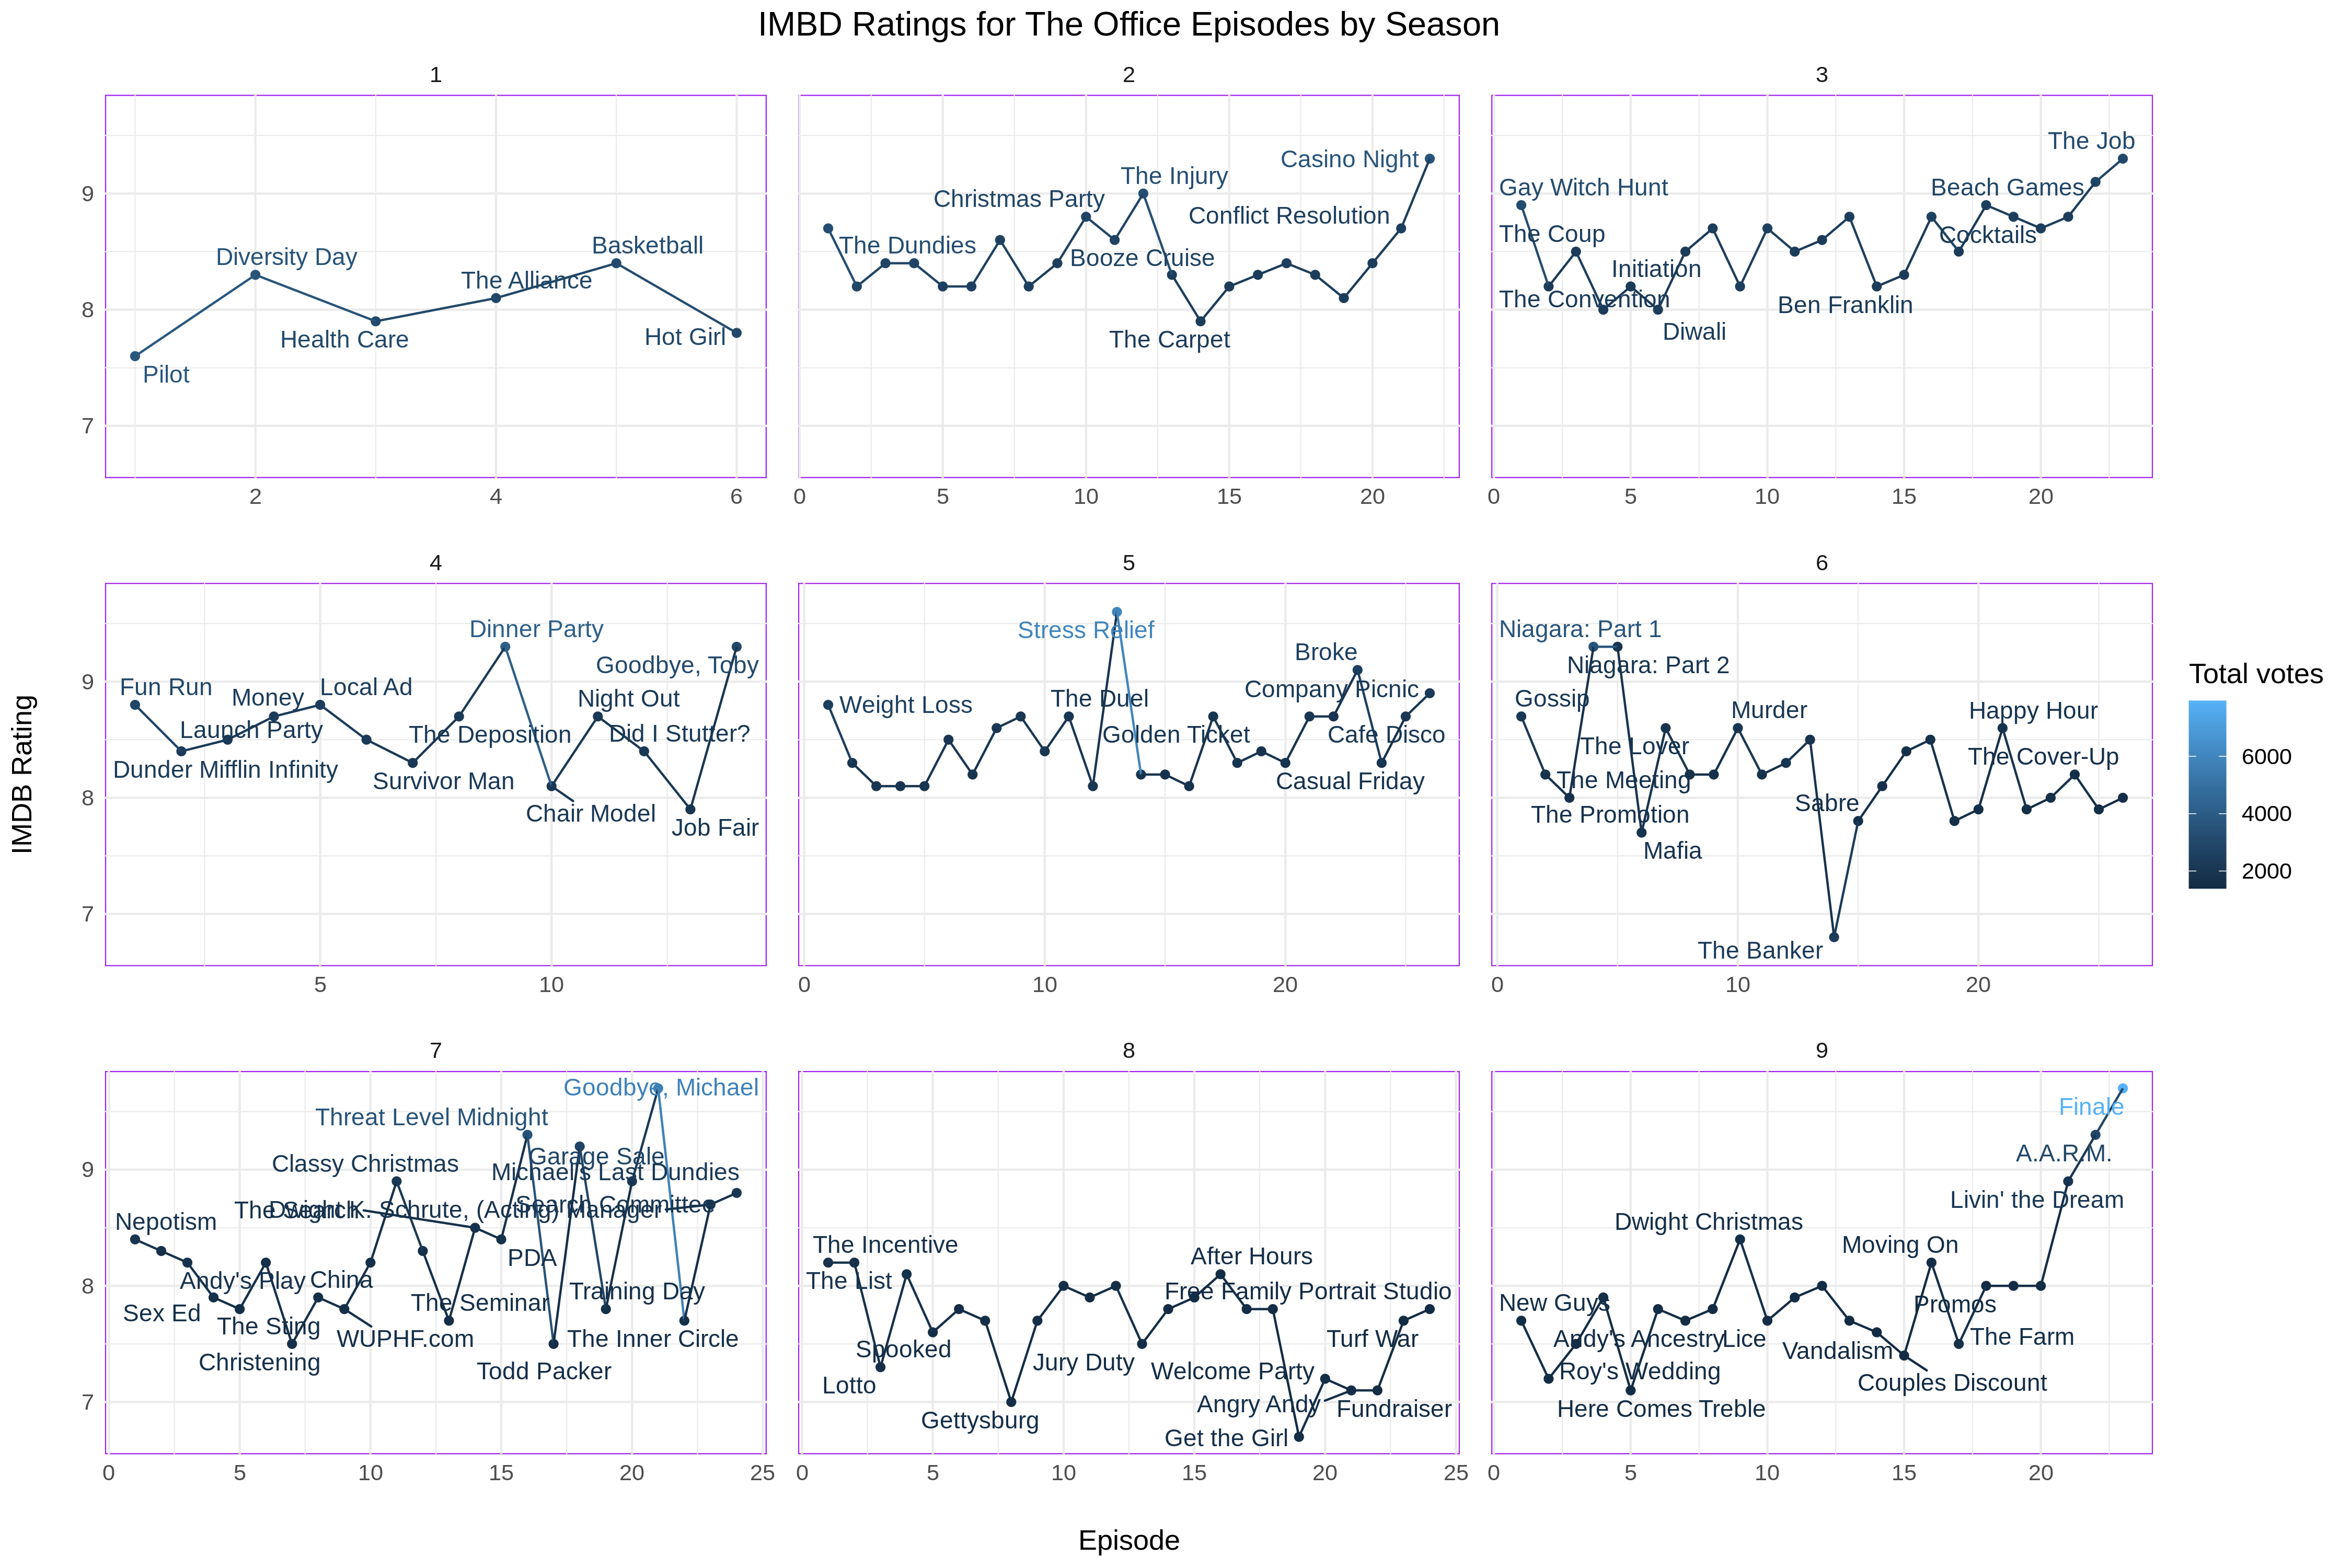

In [5]:
options(repr.plot.res=300, repr.plot.height=10, repr.plot.width=15)

ggplot(office_ratings, aes(x=episode, y=imdb_rating, color=total_votes))+
    geom_point()+ 
    geom_line()+
    facet_wrap(~season, scales='free_x')+
    geom_text_repel(data=office_ratings, aes(label=title),max.overlaps = 5)+
    theme_minimal()+
    theme(panel.background = element_rect(color='purple'))+
    labs(x='Episode', y='IMDB Rating', title='IMBD Ratings for The Office Episodes by Season',
         color='Total votes')+
    theme(plot.title=element_text(hjust=0.5) )+
    theme(text = element_text(size = 13))+
    theme(axis.title.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0)),
          axis.title.x = element_text(margin = margin(t = 20, r = 20, b = 0, l = 0)))+
    theme(panel.spacing=unit(1,"lines"))
    

In [6]:
install.packages('schrute')

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [7]:
library(schrute)
library(tibble)

tibble::glimpse(schrute::theoffice)

Rows: 55,130
Columns: 12
$ index            <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16…
$ season           <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ episode          <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ episode_name     <chr> "Pilot", "Pilot", "Pilot", "Pilot", "Pilot", "Pilot",…
$ director         <chr> "Ken Kwapis", "Ken Kwapis", "Ken Kwapis", "Ken Kwapis…
$ writer           <chr> "Ricky Gervais;Stephen Merchant;Greg Daniels", "Ricky…
$ character        <chr> "Michael", "Jim", "Michael", "Jim", "Michael", "Micha…
$ text             <chr> "All right Jim. Your quarterlies look very good. How …
$ text_w_direction <chr> "All right Jim. Your quarterlies look very good. How …
$ imdb_rating      <dbl> 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6…
$ total_votes      <int> 3706, 3706, 3706, 3706, 3706, 3706, 3706, 3706, 3706,…
$ air_date         <chr> "2005-03-24", "2005-03-24", "2005-03-24", "2005-03-24…


### Frequently appearing characters
Building on the exploration of episode popularity, next I want to find out the characters who appear most often throughout the series. 
> I used number of lines spoken by each character throughout the series and selected the top 15 characters to focus on the most prominent characters.

character,N
<fct>,<int>
Michael,10921
Dwight,6847
Jim,6303
Pam,5031
Andy,3754
Angela,1569
Kevin,1564
Erin,1440
Oscar,1368


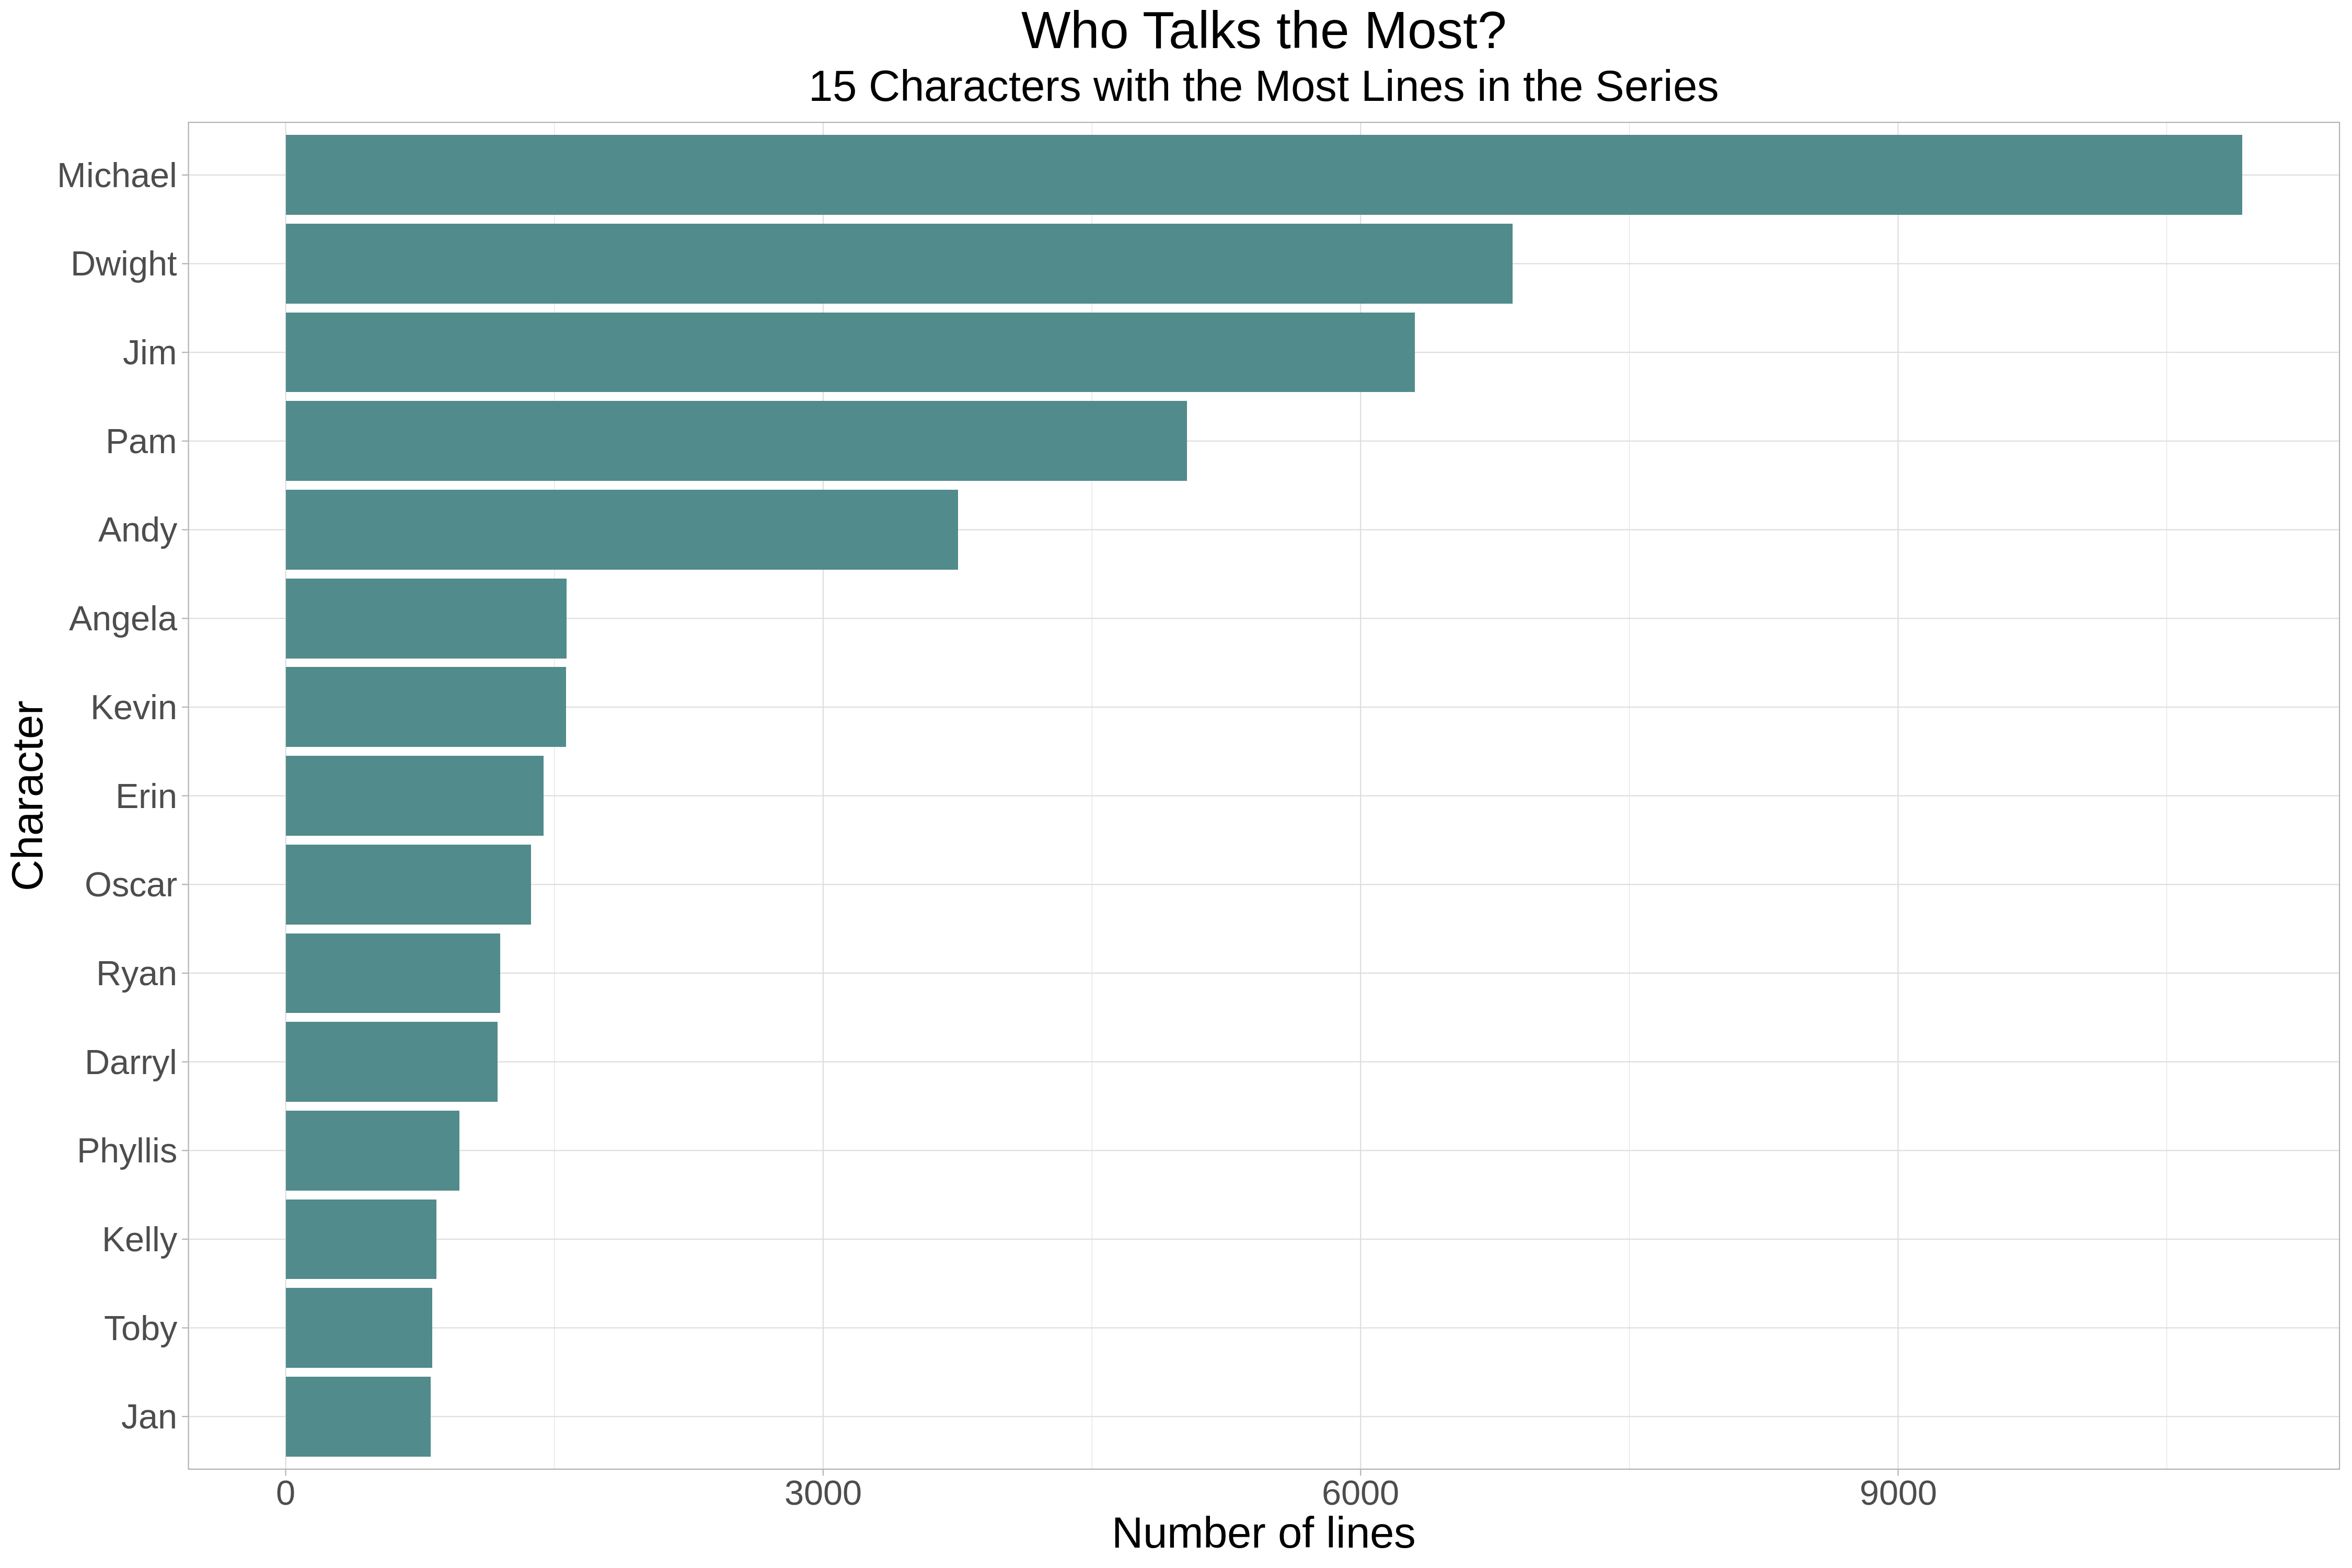

In [12]:
theoffice2= theoffice|>
    group_by(character)|>
    summarize(N=n())|>
    slice_max(order_by=N, n=15)|>
    mutate(character=fct_infreq( character,N)%>% fct_rev())

theoffice2


ggplot(theoffice2, aes(x=N, y=character ))+
    geom_col(fill='darkslategray4')+
    labs(x='Number of lines', y='Character', title='Who Talks the Most?',
       subtitle='15 Characters with the Most Lines in the Series')+
     theme_light()+
    theme(text = element_text(size = 20),plot.title=element_text(hjust=0.5),
         plot.subtitle=element_text(hjust=0.5))
   

### Exploring Relationship Between Season Popularity and Character Frequency
Now that I have analyzed both season popuolarity and character frequency independently , I want to examine their potential relationship. This can give insights into how the presence of certain characters contributes to the overall success of specific episodes.
>I will focus on the top 5 seasons with highest IMBD rating and the top 10 appearing characters. I will use a heatmap with characters on the y-axis, IMDB rating on the x-axis and color gradient to show frequency of character appearance.

In [9]:
top10ch= theoffice2|>
    slice_max(order_by=character, n=10)|>
    pull(character)
top10ch

[1] Michael Dwight  Jim     Pam     Andy    Angela  Kevin   Erin    Oscar  
[10] Ryan   
15 Levels: Jan Toby Kelly Phyllis Darryl Ryan Oscar Erin Kevin Angela ... Michael

In [10]:
theoffice3= theoffice|>
     group_by(season)|>
     summarize(rating=mean(imdb_rating))|>
     filter(rating>8.3)|>
     pull(season)

theoffice3

[1] 2 3 4 5 7

`summarise()` has grouped output by 'character', 'season'. You can override
using the `.groups` argument.


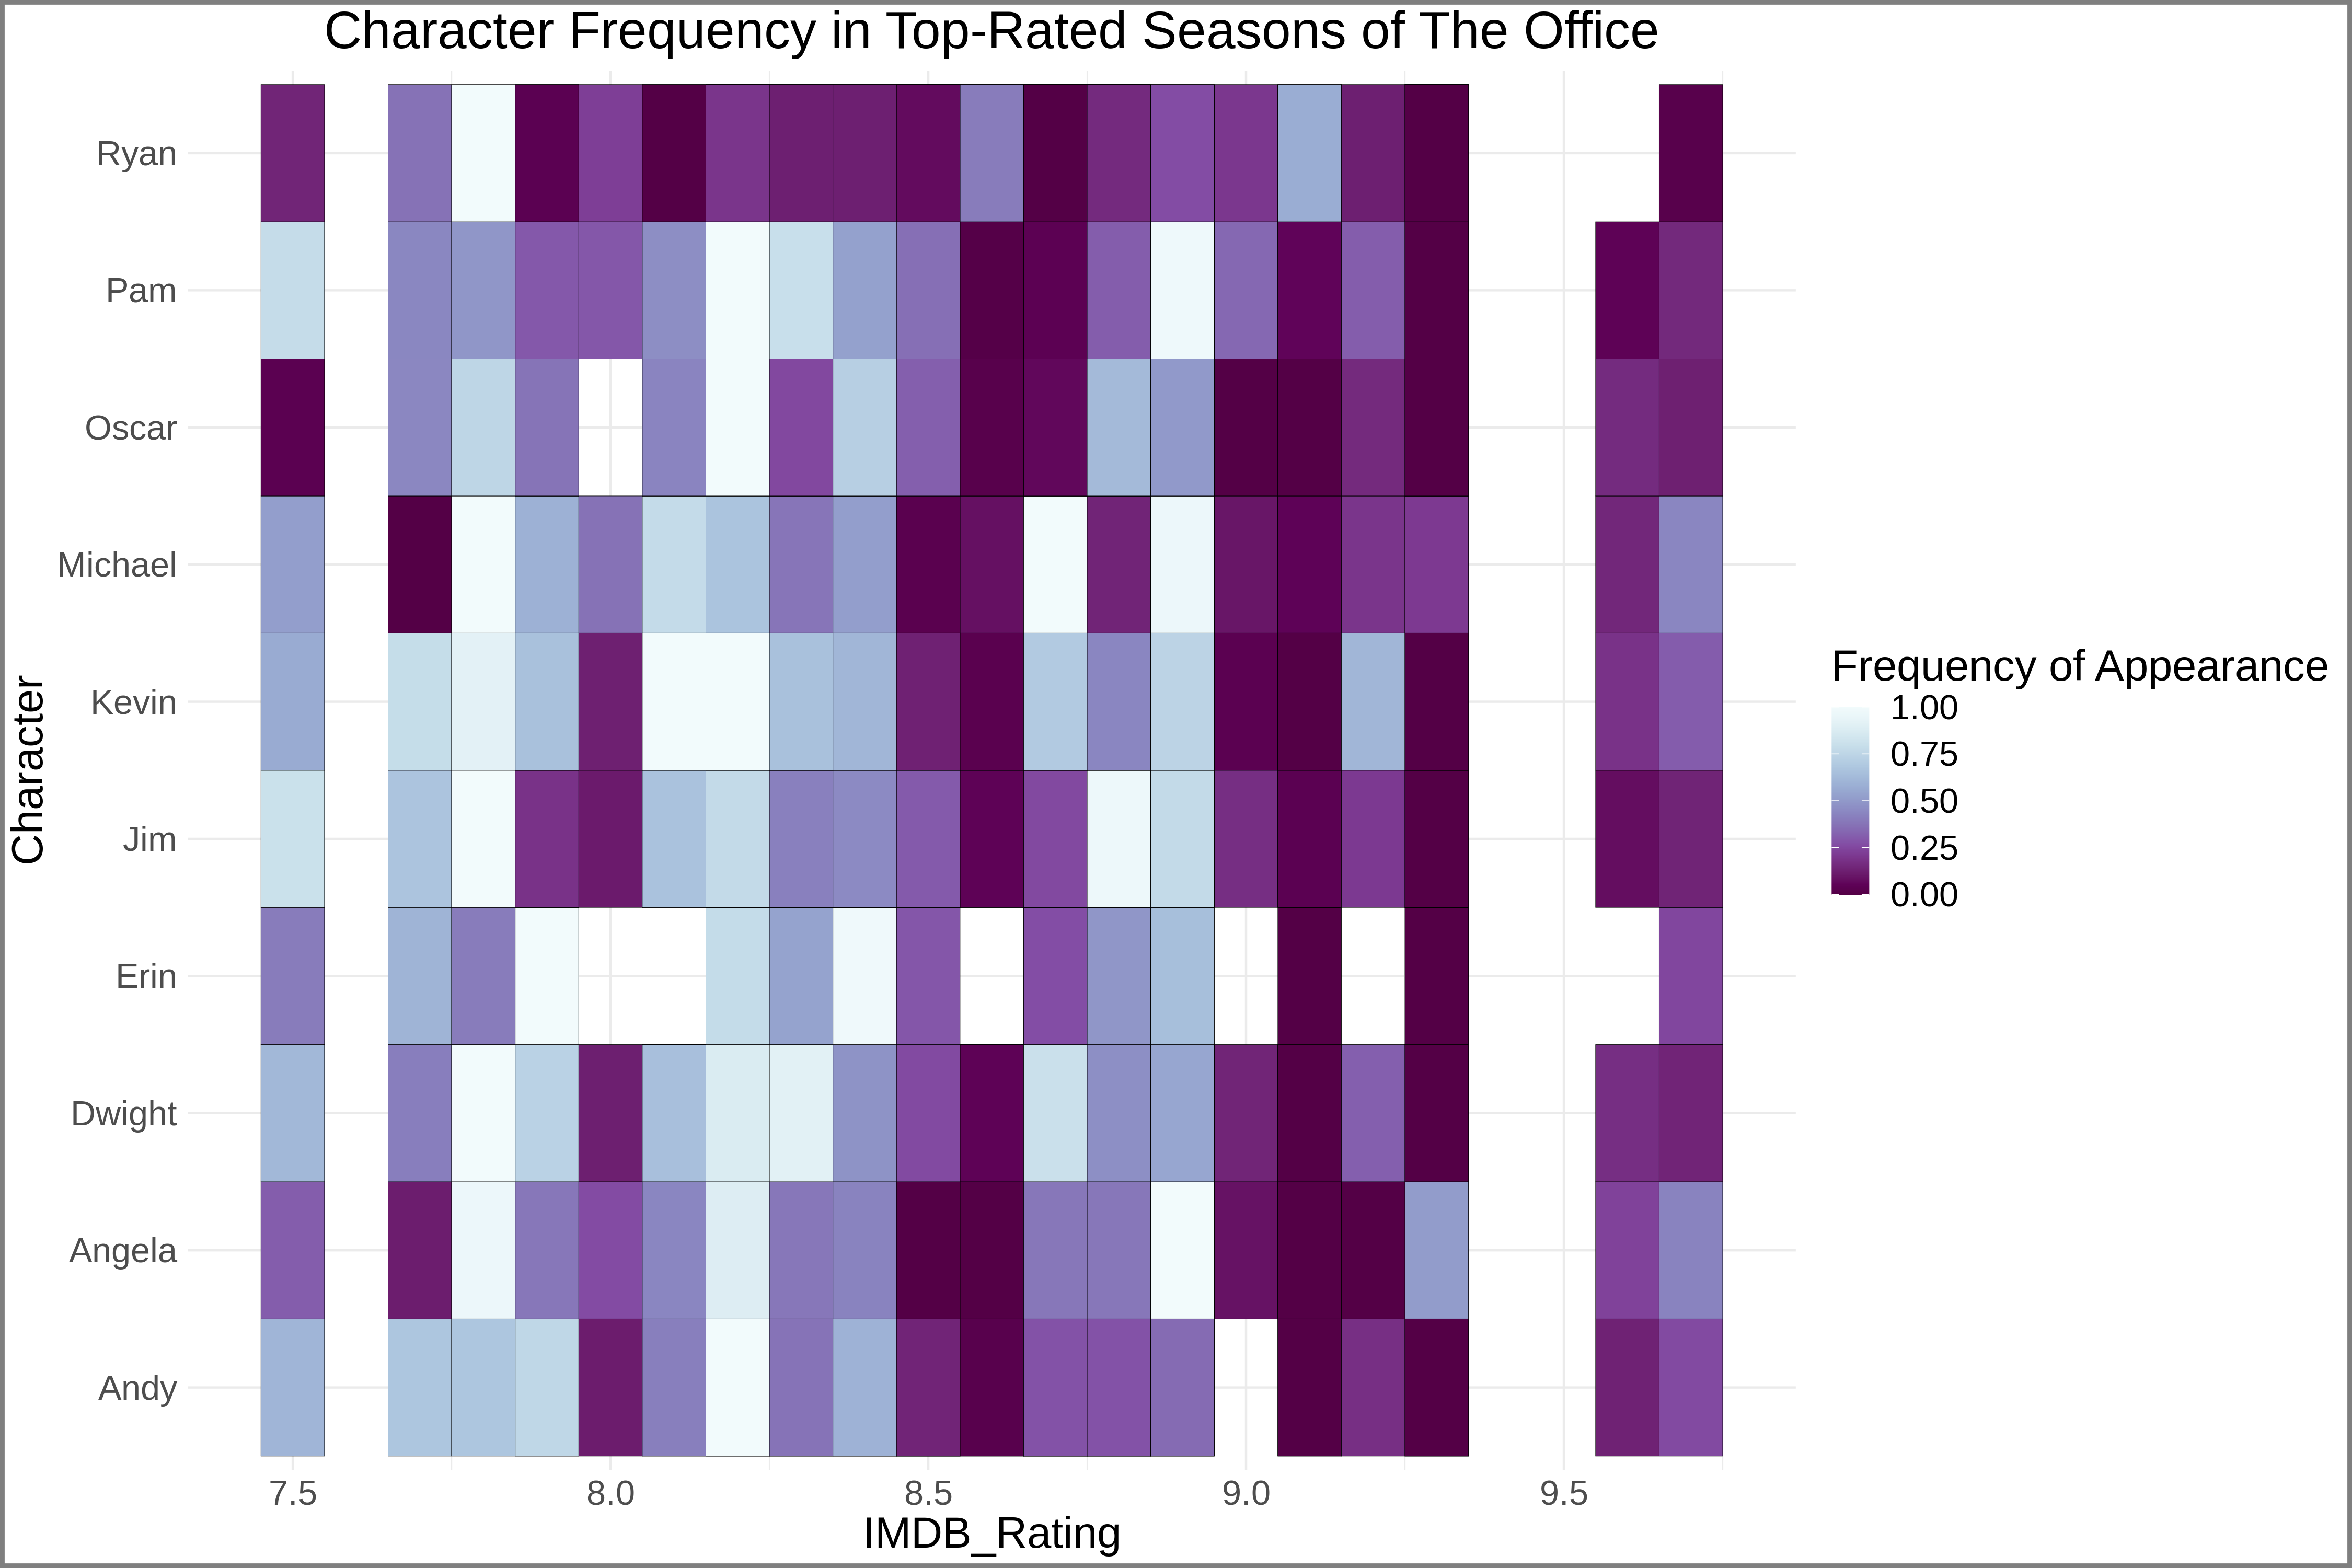

In [11]:
theoffice4= theoffice|>
    filter(season %in% theoffice3, character%in%top10ch)|>
    group_by(character, season, imdb_rating)|>
    summarize(N=n())|>
    mutate(N_scaled=scales::rescale(N))
  

ggplot(theoffice4|>drop_na(), aes(x=imdb_rating, y=character, fill=N_scaled ))+
    geom_tile(color='black')+
    scale_fill_gradientn(colors=hcl.colors(20, 'BuPu'))+
     labs(x='IMDB_Rating', y='Character', fill='Frequency of Appearance',
        title='Character Frequency in Top-Rated Seasons of The Office')+
    theme_minimal()+
    theme(plot.background = element_rect(colour = "grey50", linewidth = 2), 
          text = element_text(size = 20), plot.title=element_text(hjust=0.5))
   